In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
%pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium
 #Note: If your environment doesn't support "%pip install", use "!mamba install"

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\RenukaHebasur\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\RenukaHebasur\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\RenukaHebasur\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\RenukaHebasur\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\RenukaHebasur\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: -y


In [3]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/110.5 kB 435.7 kB/s eta 0:00:01
   ---------------------------- ---------- 81.9/110.5 kB 651.6 kB/s eta 0:00:01
   -------------------------------------- 110.5/110.5 kB 711.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [7]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

ModuleNotFoundError: No module named 'js'

In [9]:
import requests
import pandas as pd
from io import StringIO

# URL for the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data
response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    # Read the CSV data into a pandas DataFrame
    data = StringIO(response.text)
    df = pd.read_csv(data)
    print('Data downloaded and read into a dataframe!')
else:
    print("Failed to download the data.")


Data downloaded and read into a dataframe!


In [11]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [13]:
df.columns


Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

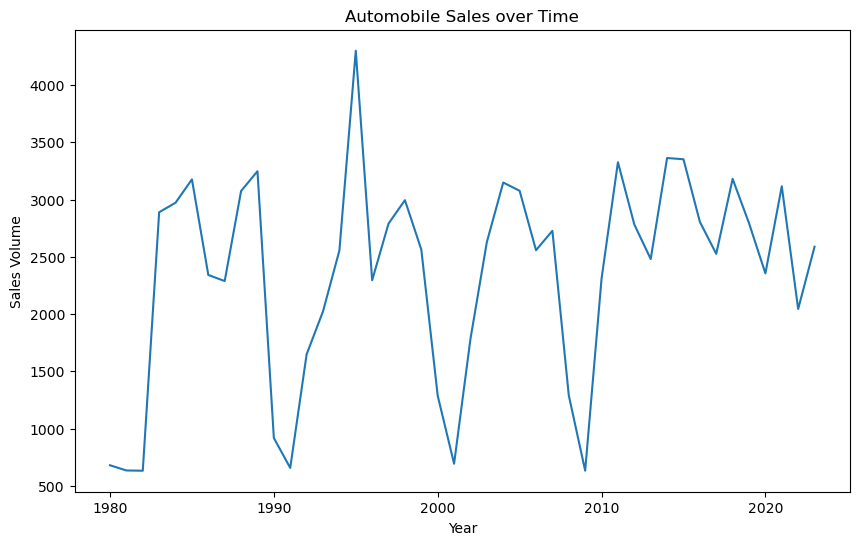

In [15]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.show()

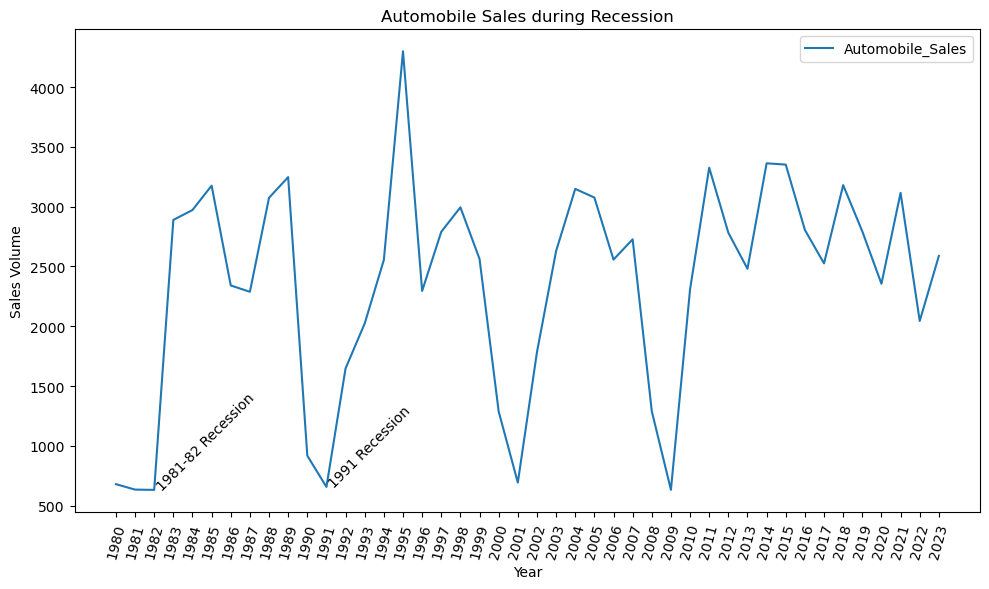

In [19]:
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales during Recession')
plt.text(1982, df_line[1982], '1981-82 Recession', rotation=45)
plt.text(1991, df_line[1991], '1991 Recession', rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("Line_Plot_1.png")
plt.show()

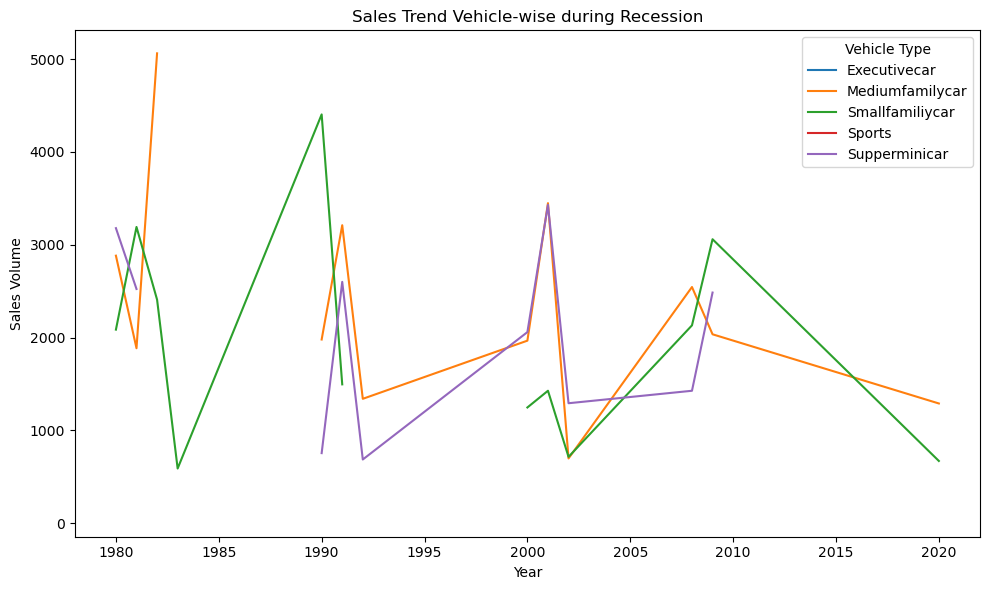

In [23]:
# Grouping by 'Year' and 'Vehicle_Type' and summing up the 'Automobile_Sales'
df_Mline = df[df['Recession'] == 1].groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plotting the sales trend for each vehicle type during recession
plt.figure(figsize=(10, 6))
df_Mline.plot(kind='line', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.savefig("Line_Plot_2.png")
plt.show()

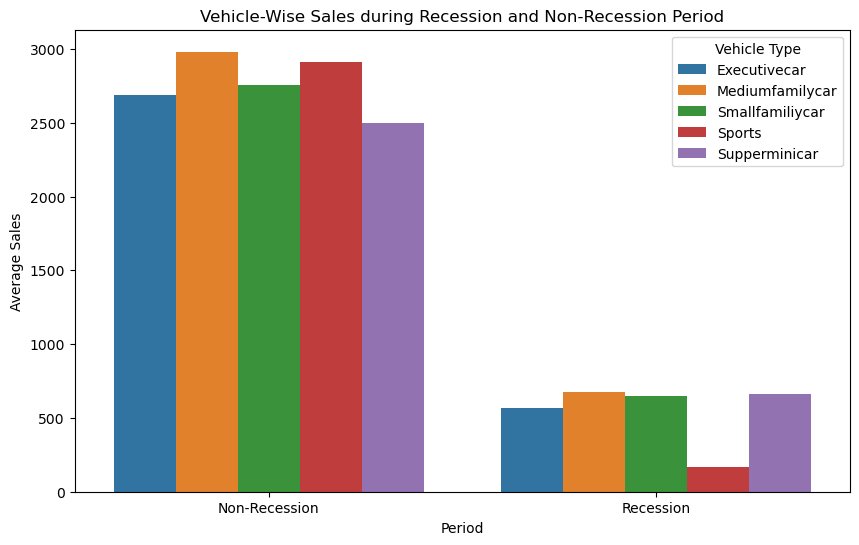

In [25]:
# Grouping data by 'Recession' and 'Vehicle_Type' and calculating the mean 'Automobile_Sales'
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Plotting the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title="Vehicle Type")

plt.show()

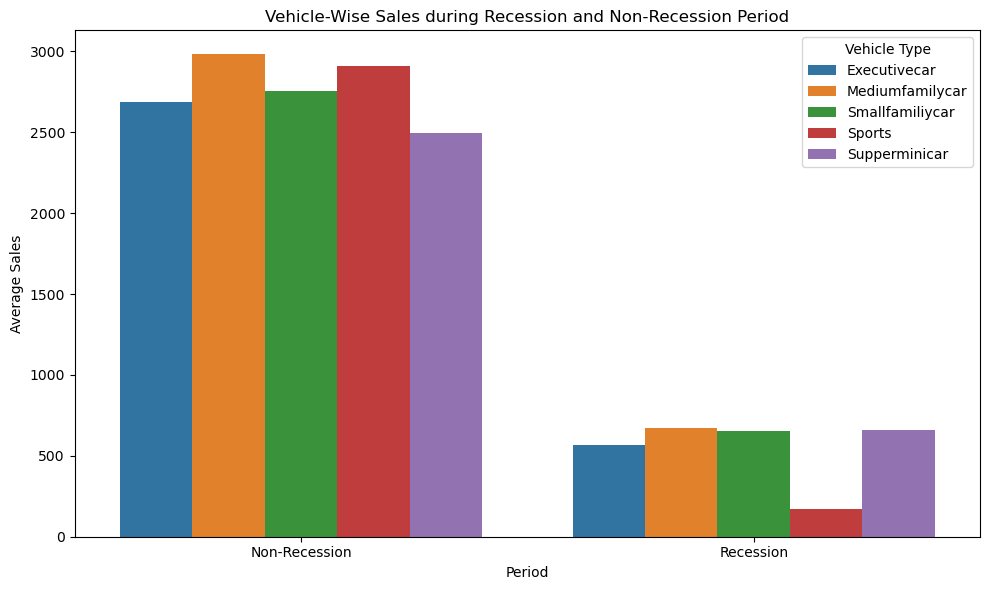

In [27]:
# Grouping the data by 'Recession' and 'Vehicle_Type' and calculating the average 'Automobile_Sales'
dd = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Creating the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.savefig("Bar_Chart.png")
plt.show()

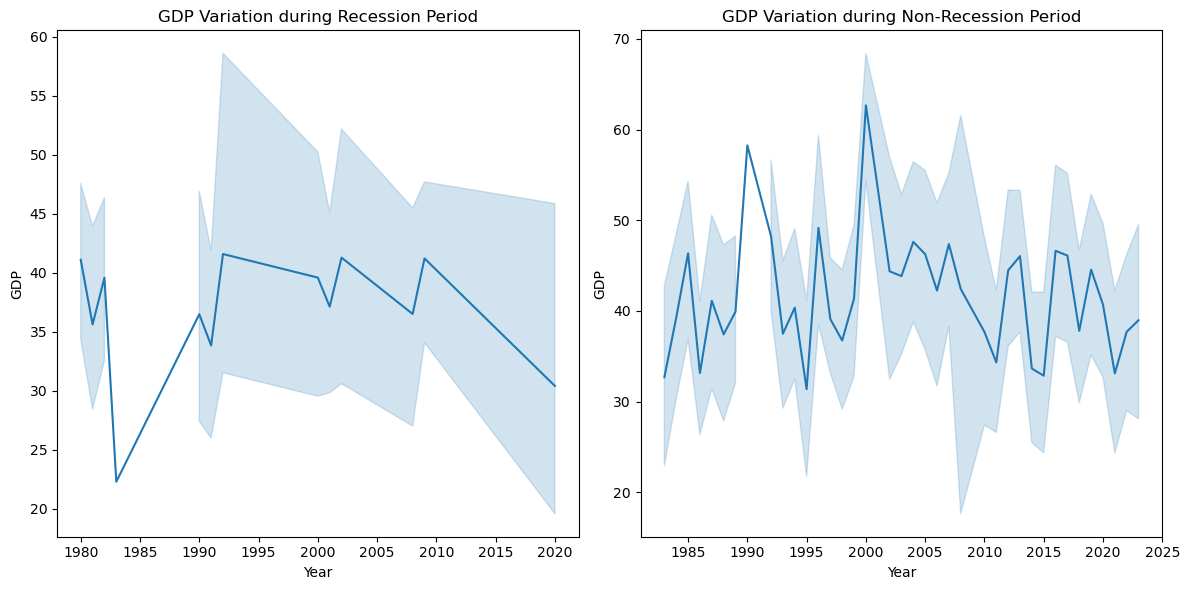

In [29]:
# Splitting data for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Creating subplots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting GDP variation during recession on the first subplot
sns.lineplot(x='Year', y='GDP', data=rec_data, ax=ax0)
ax0.set_title('GDP Variation during Recession Period')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')

# Plotting GDP variation during non-recession on the second subplot
sns.lineplot(x='Year', y='GDP', data=non_rec_data, ax=ax1)
ax1.set_title('GDP Variation during Non-Recession Period')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

plt.tight_layout()
plt.savefig("Subplot.png")
plt.show()

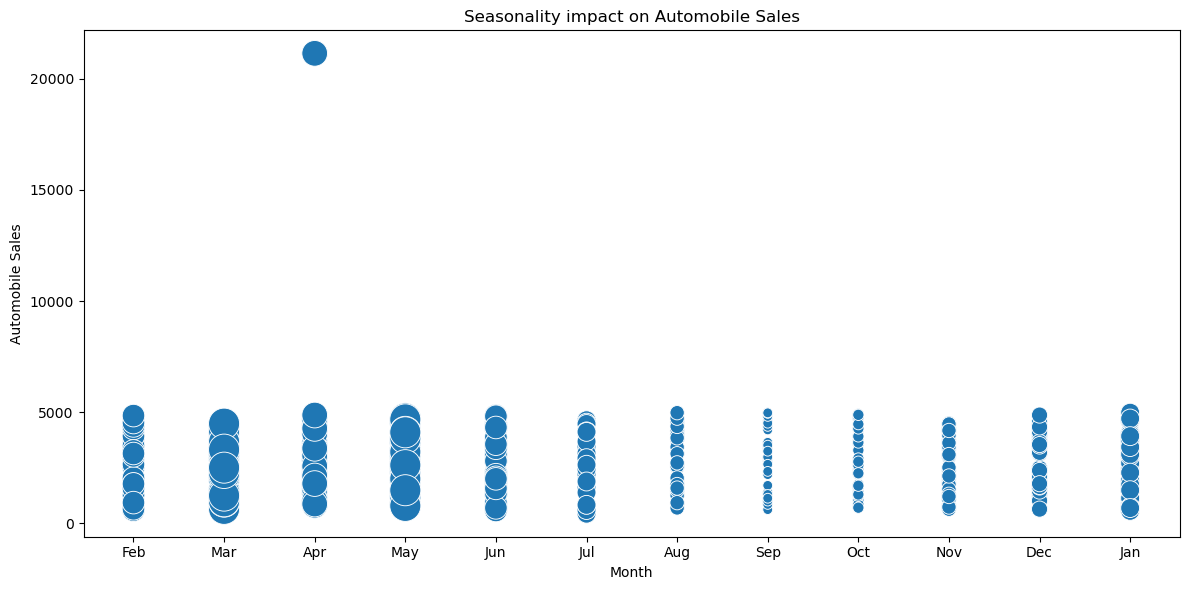

In [31]:
# Filtering for non-recession data
non_rec_data = df[df['Recession'] == 0]

# Using Seasonality_Weight for the size of bubbles
size = non_rec_data['Seasonality_Weight'] * 10  # Amplifying for better visualization

# Creating the bubble plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, legend=False, sizes=(50, 500))
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.tight_layout()
plt.savefig("Bubble.png")
plt.show()


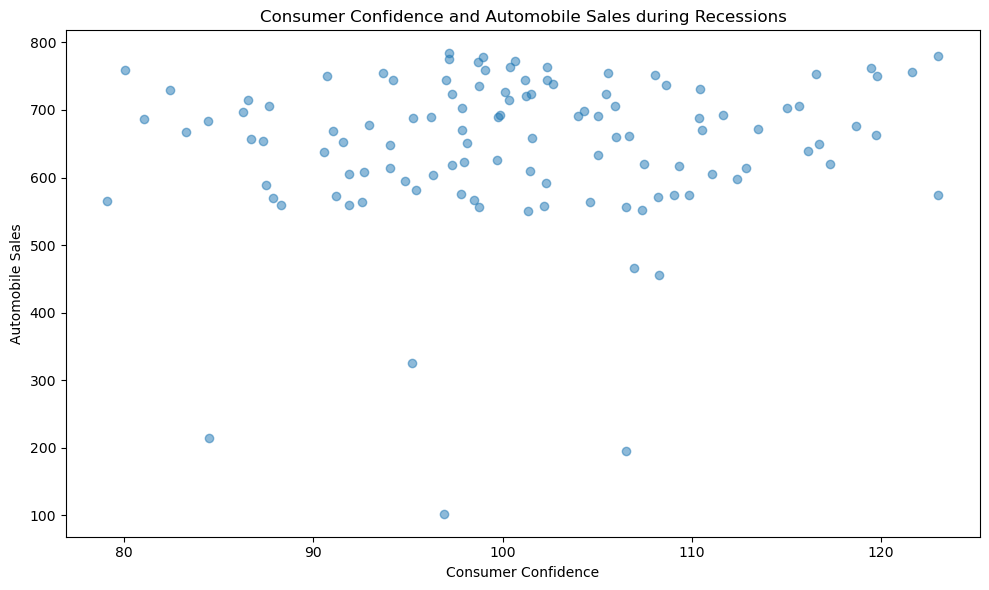

In [33]:
# Filtering for recession data
rec_data = df[df['Recession'] == 1]

# Creating a scatter plot for Consumer Confidence vs. Automobile Sales during recession
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], alpha=0.5)
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.tight_layout()
plt.savefig("Scatter_Confidence.png")
plt.show()

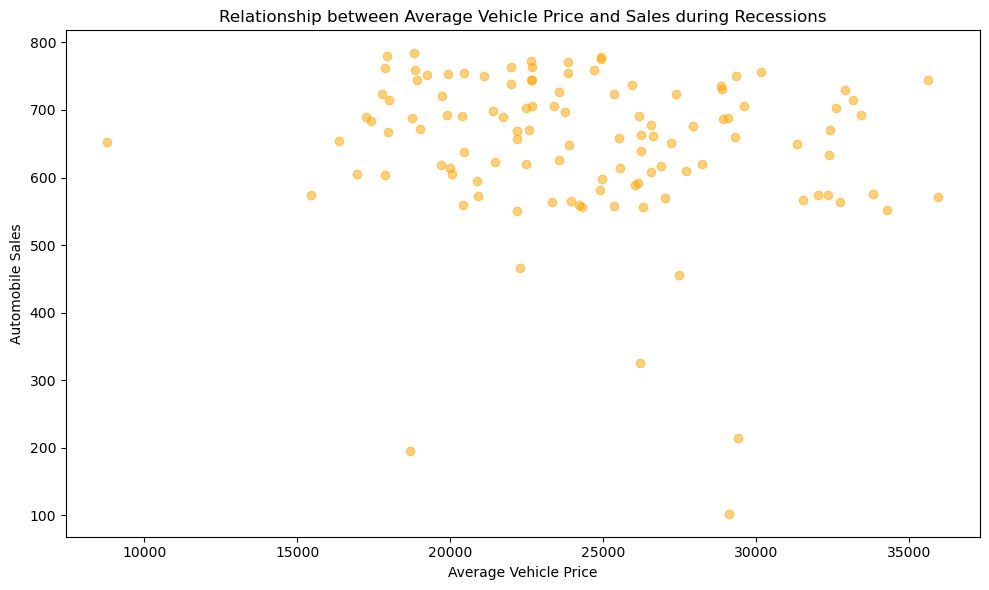

In [37]:
# Creating another scatter plot for Price vs. Automobile Sales during recession
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'], alpha=0.5, color='orange')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.tight_layout()
plt.savefig("Scatter.png")
plt.show()

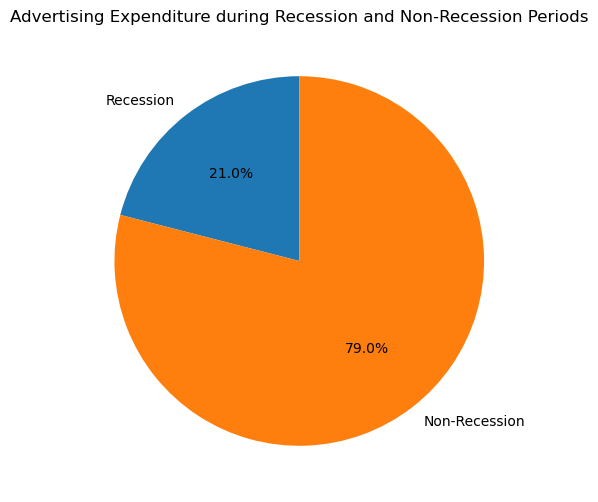

In [39]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

# Save the figure before showing it
plt.savefig("Pie_1.png", dpi=300, bbox_inches='tight')  # Adjust path as needed

plt.show()


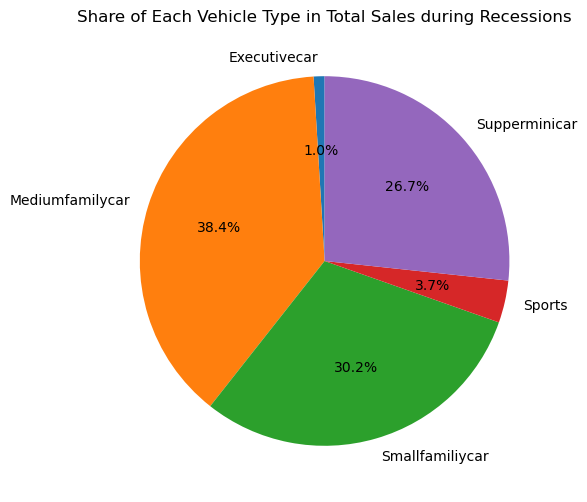

In [41]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

# Save the figure before showing it
plt.savefig("Pie_2.png", dpi=300, bbox_inches='tight')  # Adjust path as needed

# Display the plot
plt.show()

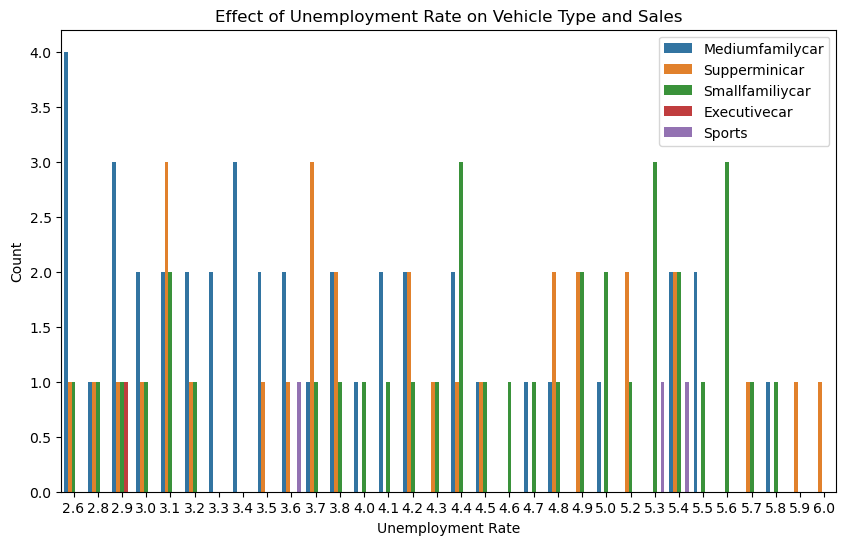

In [43]:
# Filter out the data for recession period
data= df[df['Recession'] == 1]

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')

# Set plot labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')

# Save the plot
plt.savefig("count_plot.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

KeyError: 'y'

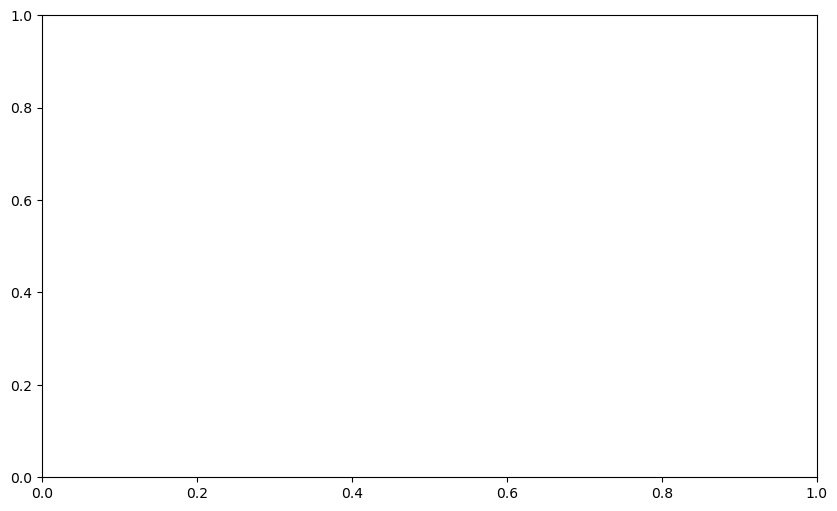

In [45]:
# Filter out the data for recession period
data = df[df['Recession'] == 1]

# Create the lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='unemployment_rate', hue='Vehicle_Type', estimator='count')

# Set plot labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')

# Save the plot
plt.savefig("line_plot.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


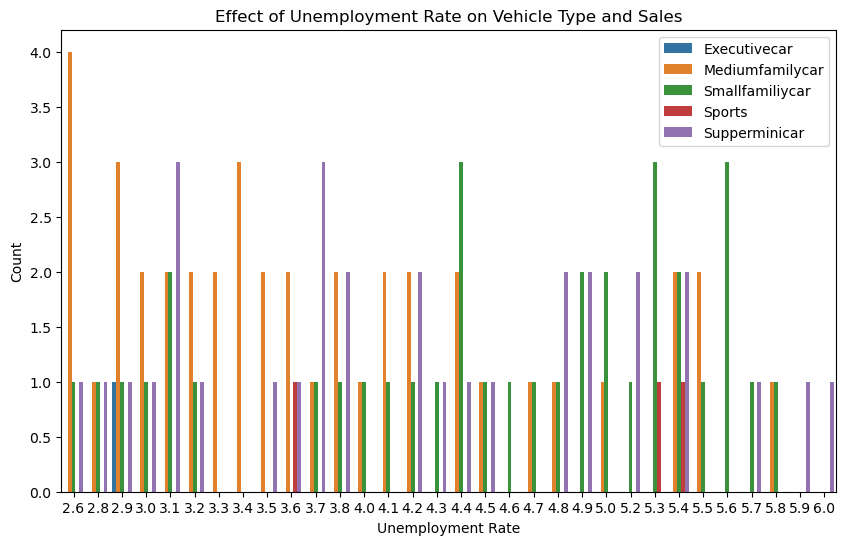

In [49]:
# Ensure the relevant columns exist
print(df.columns)

# Convert 'unemployment_rate' to numeric and 'Vehicle_Type' to categorical
df['unemployment_rate'] = pd.to_numeric(df['unemployment_rate'], errors='coerce')
df['Vehicle_Type'] = df['Vehicle_Type'].astype('category')

# Drop rows with missing values in the relevant columns
df = df.dropna(subset=['unemployment_rate', 'Vehicle_Type'])

# Filter out the data for recession period
data = df[df['Recession'] == 1]

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')

# Set plot labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')

# Save the plot
plt.savefig("count_plot.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


C:\Users\RenukaHebasur\AppData\Local\Temp\ipykernel_35168\818043712.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = data.groupby(['unemployment_rate', 'Vehicle_Type']).size().reset_index(name='Count')


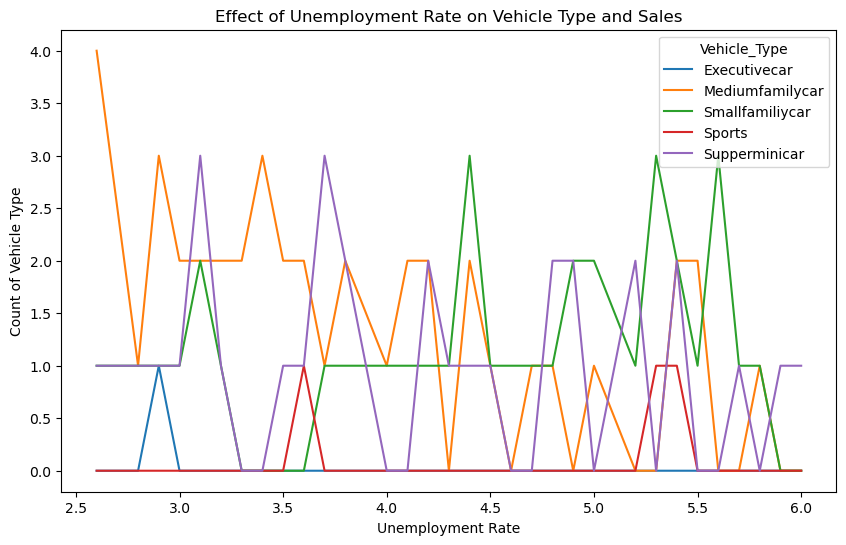

In [53]:
# Ensure the relevant columns exist
print(df.columns)

# Convert 'unemployment_rate' to numeric and 'Vehicle_Type' to categorical
df['unemployment_rate'] = pd.to_numeric(df['unemployment_rate'], errors='coerce')
df['Vehicle_Type'] = df['Vehicle_Type'].astype('category')

# Drop rows with missing values in the relevant columns
df = df.dropna(subset=['unemployment_rate', 'Vehicle_Type'])

# Filter out the data for recession period
data = df[df['Recession'] == 1]

# Aggregate data for line plot (count of Vehicle_Type vs unemployment_rate)
plot_data = data.groupby(['unemployment_rate', 'Vehicle_Type']).size().reset_index(name='Count')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='unemployment_rate', y='Count', hue='Vehicle_Type')

# Set plot labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Count of Vehicle Type')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')

# Save the plot
plt.savefig("line_plot_3.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [65]:
pip install geopandas


   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --- ------------------------------------ 30.7/323.6 kB 1.4 MB/s eta 0:00:01
   ------- -------------------------------- 61.4/323.6 kB 1.1 MB/s eta 0:00:01
   ------- -------------------------------- 61.4/323.6 kB 1.1 MB/s eta 0:00:01
   ------- -------------------------------- 61.4/323.6 kB 1.1 MB/s eta 0:00:01
   -------- ------------------------------ 71.7/323.6 kB 281.8 kB/s eta 0:00:01
   -------------------- ----------------- 174.1/323.6 kB 700.2 kB/s eta 0:00:01
   -------------------- ----------------- 174.1/323.6 kB 700.2 kB/s eta 0:00:01
   -------------------- ----------------- 174.1/323.6 kB 700.2 kB/s eta 0:00:01
   -------------------- ----------------- 174.1/323.6 kB 700.2 kB/s eta 0:00:01
   --------------------------- ---------- 235.5/323.6 kB 515.5 kB/s eta 0:00:01
   ------------------------------ ------- 256.0/323.6 kB 562.4 kB/s eta 0:00:01
   ------------------------------ ------- 256.0/323.6

In [66]:
import folium
import pandas as pd
import geopandas as gpd

# Assuming `data` is your DataFrame containing the recession data
recession_data = data[data['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Load the GeoJSON file using GeoPandas
geo_data = gpd.read_file('us-states.json')  # Replace with the correct path to your GeoJSON file

# Ensure that the 'City' column in `sales_by_city` matches the key in the geo_data
# Here I'm assuming the GeoJSON has a 'name' property for the states or a corresponding column
# You may need to adjust this part based on the actual structure of your data

# Merge the sales data with the geographical data
# You might need to change 'name' to the actual key used in your GeoJSON (e.g., 'state' or 'state_name')
merged_data = geo_data.merge(sales_by_city, left_on='name', right_on='City', how='left')

# Create a folium map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create the choropleth map using Folium
choropleth = folium.Choropleth(
    geo_data=merged_data,  # Use the merged data
    data=merged_data,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',  # Ensure this key matches the properties in your geojson
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name', 'Automobile_Sales'], labels=True)
)

# Display the map
map1


In [76]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
#app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]

# List of years 
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    # Title for the dashboard with the specified styles
    html.H1("Automobile Sales Statistics Dashboard",  #May include style for title
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': '24px'}
    ),
   
    html.Div([#TASK 2.2: Add two dropdown menus
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
            ],
            placeholder='Select a report type',
            value='Select Statistics',
            style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
        )
    ]),

    # Dropdown for year selection
    html.Div([
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            placeholder='Select a year',
            style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}),
        html.Div([
            html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
        ]),])
])

#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='report-type-dropdown', component_property='value')
)
def update_input_container(selected_statistics):
    if selected_statistics == 'Yearly Statistics':
        return True
    else:
        return False

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
     Input(component_id='select-year', component_property='value')]
)
def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]
        
#TASK 2.5: Create and display graphs for Recession Report Statistics

#Plot 1 Automobile sales fluctuate over Recession Period (year wise)
        # use groupby to create relevant data for plotting
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, 
                        x='Year',
                        y='Automobile_Sales',
                        title="Automobile Sales Fluctuation Over Recession Period")
        )


#Plot 2 Calculate the average number of vehicles sold by vehicle type       
        # use groupby to create relevant data for plotting
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(
            figure=px.bar(average_sales, 
                        x='Vehicle_Type', 
                        y='Automobile_Sales',
                        title="Average Vehicles Sold by Vehicle Type During Recession")
        )

        
# Plot 3 Pie chart for total expenditure share by vehicle type during recessions
        # use groupby to create relevant data for plotting
        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec, 
                        values='Advertising_Expenditure', 
                        names='Vehicle_Type',
                        title="Expenditure Share by Vehicle Type During Recession")
        )


# Plot 4 bar chart for the effect of unemployment rate on vehicle type and sales
        unemployment_data = recession_data.groupby('Vehicle_Type')['Unemployment_Rate'].mean().reset_index()
        R_chart4 = dcc.Graph(
            figure=px.bar(unemployment_data, 
                        x='Vehicle_Type', 
                        y='Unemployment_Rate',
                        title="Effect of Unemployment Rate on Vehicle Type During Recession")
        )



        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1), html.Div(children=R_chart2)]),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=R_chart4)])
        ]


# TASK 2.6: Create and display graphs for Yearly Report Statistics
 # Yearly Statistic Report Plots                             
    elif (input_year and selected_statistics == 'Yearly Statistics') :
        yearly_data = data[data['Year'] == input_year]
                              
#TASK 2.5: Creating Graphs Yearly data
                              
#plot 1 Yearly Automobile sales using line chart for the whole period.
        yas = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(
            figure=px.line(yas, 
                        x='Year',
                        y='Automobile_Sales',
                        title="Yearly Automobile Sales Over Time")
        )

            
# Plot 2 Total Monthly Automobile sales using line chart.
        monthly_sales = yearly_data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(
            figure=px.line(monthly_sales, 
                        x='Month', 
                        y='Automobile_Sales',
                        title="Total Monthly Automobile Sales for the Year {}".format(input_year))
        )

            # Plot bar chart for average number of vehicles sold during the given year
        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(
            figure=px.bar(avr_vdata, 
                        x='Vehicle_Type', 
                        y='Automobile_Sales',
                        title="Average Vehicles Sold by Vehicle Type in the year {}".format(input_year))
        )

            # Total Advertisement Expenditure for each vehicle using pie chart
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(exp_data, 
                        values='Advertising_Expenditure', 
                        names='Vehicle_Type',
                        title="Advertisement Expenditure by Vehicle Type for the Year {}".format(input_year))
        )


#TASK 2.6: Returning the graphs for displaying Yearly data
        return [
            html.Div(className='chart-item', children=[html.Div(children=Y_chart1), html.Div(children=Y_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)], style={'display': 'flex'})
        ]

                
    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [74]:
!pip install dash


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.8 MB 558.5 kB/s eta 0:00:14
   ---------------------------------------- 0.1/7.8 MB 558.5 kB/s eta 0:00:14
   ---------------------------------------- 0.1/7.8 MB 521.8 kB/s eta 0:00:15
   ---------------------------------------- 0.1/7.8 MB 521.8 kB/s eta 0:00:15
   ---------------------------------------- 0.1/7.8 MB 521.8 kB/s eta 0:00:15
   ---------------------------------------- 0.1/7.8 MB 521.8 kB/s eta 0:00:15
   ---------------------------------------- 0.1/7.8 MB 521.8 kB/s eta 0:00:15
    --------------------------------------- 0.2/7.8 MB 352.2 kB/s eta 0:00:22
    --------------------------------------- 0.2/7.8 MB 352.2 kB/s eta 0:00:22
    --------------------------------------- 0.2/7.8 MB 327.7 kB/s eta 0:00:24
    ---------

In [1]:
pip install dash jupyter-dash


Note: you may need to restart the kernel to use updated packages.


In [2]:
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output


In [38]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)


In [90]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
#app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]

# List of years 
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    # Title for the dashboard with the specified styles
    html.H1("Automobile Sales Statistics Dashboard",  #May include style for title
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': '24px'}
    ),
   
    html.Div([#TASK 2.2: Add two dropdown menus
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
            ],
            placeholder='Select a report type',
            value='Select Statistics',
            style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
        )
    ]),

    # Dropdown for year selection
    html.Div([
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            placeholder='Select a year',
            style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}),
        html.Div([
            html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
        ]),])
])

#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='report-type-dropdown', component_property='value')
)
def update_input_container(selected_statistics):
    if selected_statistics == 'Yearly Statistics':
        return True
    else:
        return False

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
     Input(component_id='select-year', component_property='value')]
)
def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]
        
#TASK 2.5: Create and display graphs for Recession Report Statistics

#Plot 1 Automobile sales fluctuate over Recession Period (year wise)
        # use groupby to create relevant data for plotting
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, 
                        x='Year',
                        y='Automobile_Sales',
                        title="Automobile Sales Fluctuation Over Recession Period")
        )


#Plot 2 Calculate the average number of vehicles sold by vehicle type       
        # use groupby to create relevant data for plotting
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(
            figure=px.bar(average_sales, 
                        x='Vehicle_Type', 
                        y='Automobile_Sales',
                        title="Average Vehicles Sold by Vehicle Type During Recession")
        )

        
# Plot 3 Pie chart for total expenditure share by vehicle type during recessions
        # use groupby to create relevant data for plotting
        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec, 
                        values='Advertising_Expenditure', 
                        names='Vehicle_Type',
                        title="Expenditure Share by Vehicle Type During Recession")
        )


# Plot 4 bar chart for the effect of unemployment rate on vehicle type and sales
        unemployment_data = recession_data.groupby('Vehicle_Type')['Unemployment_Rate'].mean().reset_index()
        R_chart4 = dcc.Graph(
            figure=px.bar(unemployment_data, 
                        x='Vehicle_Type', 
                        y='Unemployment_Rate',
                        title="Effect of Unemployment Rate on Vehicle Type During Recession")
        )



        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1), html.Div(children=R_chart2)]),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=R_chart4)])
        ]


# TASK 2.6: Create and display graphs for Yearly Report Statistics
 # Yearly Statistic Report Plots                             
    elif (input_year and selected_statistics == 'Yearly Statistics') :
        yearly_data = data[data['Year'] == input_year]
                              
#TASK 2.5: Creating Graphs Yearly data
                              
#plot 1 Yearly Automobile sales using line chart for the whole period.
        yas = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(
            figure=px.line(yas, 
                        x='Year',
                        y='Automobile_Sales',
                        title="Yearly Automobile Sales Over Time")
        )

            
# Plot 2 Total Monthly Automobile sales using line chart.
        monthly_sales = yearly_data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(
            figure=px.line(monthly_sales, 
                        x='Month', 
                        y='Automobile_Sales',
                        title="Total Monthly Automobile Sales for the Year {}".format(input_year))
        )

            # Plot bar chart for average number of vehicles sold during the given year
        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(
            figure=px.bar(avr_vdata, 
                        x='Vehicle_Type', 
                        y='Automobile_Sales',
                        title="Average Vehicles Sold by Vehicle Type in the year {}".format(input_year))
        )

            # Total Advertisement Expenditure for each vehicle using pie chart
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(exp_data, 
                        values='Advertising_Expenditure', 
                        names='Vehicle_Type',
                        title="Advertisement Expenditure by Vehicle Type for the Year {}".format(input_year))
        )


#TASK 2.6: Returning the graphs for displaying Yearly data
        return [
            html.Div(className='chart-item', children=[html.Div(children=Y_chart1), html.Div(children=Y_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)], style={'display': 'flex'})
        ]

                
    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)
